In [1]:
import numpy as np
from numpy.linalg.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.markers import MarkerStyle
import cartopy.crs as ccrs
import cartopy.feature as cfeaturel
import pandas as pd

# データの読み込み 
data_dir = '/home/maeda/machine_learning/results/kikuchi-7vals_v1/cor/olr-u-h850-prw/'

lt_0    = data_dir + 'result-value_7vals_0day.npz'
lt_1    = data_dir + 'result-value_7vals_1day.npz'
lt_3    = data_dir + 'result-value_7vals_3day.npz'
lt_5    = data_dir + 'result-value_7vals_5day.npz'
lt_10   = data_dir + 'result-value_7vals_10day.npz'
lt_15   = data_dir + 'result-value_7vals_15day.npz'
lt_20   = data_dir + 'result-value_7vals_20day.npz'
lt_25   = data_dir + 'result-value_7vals_25day.npz'
lt_30   = data_dir + 'result-value_7vals_30day.npz'
lt_35   = data_dir + 'result-value_7vals_35day.npz'

df_0 = np.load(lt_0)
df_1 = np.load(lt_1)
df_3 = np.load(lt_3)
df_5 = np.load(lt_5)
df_10 = np.load(lt_10)
df_15 = np.load(lt_15)
df_20 = np.load(lt_20)
df_25 = np.load(lt_25)
df_30 = np.load(lt_30)
df_35 = np.load(lt_35)


In [2]:
df_box = [df_0, df_1, df_3, df_5, df_10, df_15, df_20, df_25, df_30, df_35]
pred = []
sup  = []
for data in df_box:
    pred_i = data['arr_0']
    sup_i = data['arr_1']
    pred.append(pred_i)
    sup.append(sup_i)
    print('pred, sup = ', pred_i.shape, sup_i.shape)

pred, sup =  (2556, 2) (2556, 2)
pred, sup =  (2555, 2) (2555, 2)
pred, sup =  (2553, 2) (2553, 2)
pred, sup =  (2551, 2) (2551, 2)
pred, sup =  (2546, 2) (2546, 2)
pred, sup =  (2541, 2) (2541, 2)
pred, sup =  (2536, 2) (2536, 2)
pred, sup =  (2531, 2) (2531, 2)
pred, sup =  (2526, 2) (2526, 2)
pred, sup =  (2521, 2) (2521, 2)


In [3]:
# 相関係数の計算
def culc_cor(test_data, pred_data):
    j = 0
    cor = (np.sum(pred_data[:,2*j] * test_data[:,2*j], axis=0) + np.sum(pred_data[:,2*j+1] * test_data[:,2*j+1], axis=0)) / \
            (np.sqrt(np.sum(pred_data[:,2*j] ** 2 + pred_data[:,2*j+1] ** 2, axis=0)) * np.sqrt(np.sum(test_data[:,2*j] ** 2 + test_data[:,2*j+1] ** 2, axis=0)))
    #print('cor : = ', cor)
    return cor

In [4]:
lead_time = [0, 1, 3, 5, 10, 15, 20, 25, 30, 35]
cor = np.zeros((len(lead_time), 5))
for i in range(len(pred)):
    rt = pd.date_range('2015-01-01', periods=len(pred[i]), freq='D')    # real time のインデックスは'与えるデータの初期時刻'で定めておく
    
    jja = jja = rt.month.isin([6, 7, 8])
    djf = rt.month.isin([12, 1, 2])
    mjjaso = rt.month.isin([5, 6, 7, 8, 9, 10])
    ndjfma = rt.month.isin([11, 12, 1, 2, 3, 4])
    pred_jja     = pred[i][jja]
    pred_djf     = pred[i][djf]
    pred_mjjaso  = pred[i][mjjaso]
    pred_ndjfma  = pred[i][ndjfma]
    sup_jja      = sup[i][jja]
    sup_djf      = sup[i][djf]
    sup_mjjaso   = sup[i][mjjaso]
    sup_ndjfma   = sup[i][ndjfma]
    print('=== lead time : {} day ==='.format(lead_time[i]))
    cor[i, 0]   = culc_cor(sup_jja, pred_jja)
    cor[i, 1]   = culc_cor(sup_djf, pred_djf)
    cor[i, 2]   = culc_cor(sup_mjjaso, pred_mjjaso)
    cor[i, 3]   = culc_cor(sup_ndjfma, pred_ndjfma)
    cor[i, 4]   = culc_cor(sup[i], pred[i])
print('jja, djf, mjjaso, ndjfma, all')
print(cor)

=== lead time : 0 day ===
=== lead time : 1 day ===
=== lead time : 3 day ===
=== lead time : 5 day ===
=== lead time : 10 day ===
=== lead time : 15 day ===
=== lead time : 20 day ===
=== lead time : 25 day ===
=== lead time : 30 day ===
=== lead time : 35 day ===
jja, djf, mjjaso, ndjfma, all
[[0.9339018  0.8552619  0.91016983 0.86498333 0.89485   ]
 [0.93534423 0.86167451 0.91513416 0.87408551 0.90119686]
 [0.93427929 0.86698816 0.91328708 0.87904827 0.90177377]
 [0.92509017 0.86178152 0.89419303 0.86505615 0.88445594]
 [0.85331091 0.79532875 0.82455663 0.78364621 0.81102996]
 [0.75804583 0.64291093 0.72012569 0.59542068 0.67924451]
 [0.67268201 0.5565011  0.64247456 0.49160118 0.59413383]
 [0.6445461  0.44530777 0.58351922 0.40504494 0.52416604]
 [0.54543044 0.40668838 0.47870149 0.31766768 0.42817229]
 [0.4197835  0.31787204 0.37591158 0.28860337 0.34668722]]


In [5]:
cor_mm = np.zeros((len(lead_time),12))
for i in range(len(pred)):
    rt = pd.date_range('2015-01-01', periods=len(pred[i]), freq='D')    # real time のインデックスは'与えるデータの初期時刻'で定めておく
    for m in range(1, 13):
        mm = rt.month == m
        pred_m          = pred[i][mm]
        sup_m           = sup[i][mm]
        cor_mm[i, m-1]  = culc_cor(sup_m, pred_m)

print(cor_mm)

[[0.82729799 0.81981006 0.83488012 0.8807923  0.89338642 0.93660566
  0.94209067 0.92140645 0.8436147  0.89320803 0.8848607  0.90129465]
 [0.84336123 0.82174867 0.8498969  0.89278688 0.90233253 0.93761217
  0.93872138 0.92997482 0.8382347  0.9145611  0.89455556 0.90982741]
 [0.82721931 0.84704664 0.83861927 0.89818473 0.87774225 0.93511747
  0.94473699 0.92091481 0.8578077  0.91119841 0.90321575 0.91008086]
 [0.81661731 0.8592743  0.80368642 0.87558733 0.83013845 0.93130273
  0.93311847 0.90563672 0.83813463 0.87868913 0.8889746  0.9020891 ]
 [0.72962358 0.82081653 0.70627658 0.75687396 0.7114374  0.84551434
  0.8551223  0.86243214 0.78705162 0.8521575  0.81673426 0.82740416]
 [0.52741701 0.7423984  0.51370846 0.54212277 0.61457181 0.74432327
  0.77413469 0.75735773 0.61557102 0.76823284 0.5983998  0.66139189]
 [0.48687698 0.64451923 0.45858632 0.51678085 0.55317077 0.68672898
  0.65590828 0.68318154 0.58862352 0.68146236 0.37350834 0.54343827]
 [0.35667865 0.54241545 0.35242224 0.4362

[ 1  2  3  4  5  6  7  8  9 10 11 12]


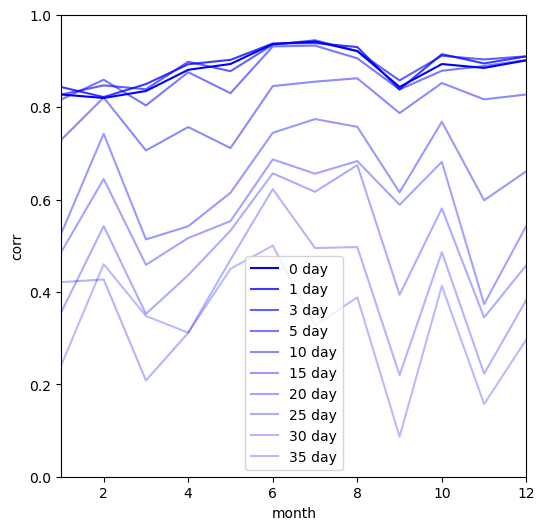

In [10]:
x_month = np.arange(1, 13)
print(x_month)
plt.figure(figsize=(6, 6))
for j in range(len(lead_time)):
    plt.plot(x_month, cor_mm[j,:], color='b', alpha=1/(j*.3+1), label='{} day'.format(lead_time[j]))  
plt.ylim(0.0,1.0)
plt.xlim(1,12)
plt.xlabel('month')
plt.ylabel('corr')
plt.legend()

In [8]:
nicam_bsiso = np.array([
    [0.6145144, 0.9919250],
    [0.1220745, 0.9920530],
    [1.3663927, 0.9862836],
    [2.1182138, 0.9798000],
    [2.8703655, 0.9781713],
    [3.6222251, 0.9722551],
    [4.3740378, 0.9656494],
    [5.1258372, 0.9588480],
    [5.8775442, 0.9506906],
    [6.6293278, 0.9436571],
    [7.3810713, 0.9360362],
    [8.1326835, 0.9264866],
    [8.8840872, 0.9138771],
    [9.6354934, 0.9013038],
    [10.3868744, 0.888360],
    [11.1382741, 0.875693],
    [11.8897835, 0.864635],
    [12.6411853, 0.8519968],
    [13.3922926, 0.8350366],
    [14.1431426, 0.8142987],
    [14.8939842, 0.7934375],
    [15.6448970, 0.7736204],
    [16.3958043, 0.7537236],
    [17.1467724, 0.7347187],
    [17.8979889, 0.7193610],
    [18.6494207, 0.7071647],
    [19.4007518, 0.6934893],
    [20.1520385, 0.6791613],
    [20.9035726, 0.6684660],
    [21.6550534, 0.6569876],
    [22.4061780, 0.6402813],
    [23.1569510, 0.6184123],
    [23.9078067, 0.5977576],
    [24.7032303, 0.5829329],
    [25.4095400, 0.5567711],
    [26.1602745, 0.5343365],
    [26.8743596, 0.5125842],
    [27.4597305, 0.4867337],
    [28.0817463, 0.4601367],
    [28.7504060, 0.4449050]
])

# MJO skill scores of NICAM (Miyakawa+13)
# 2008-2012年の各１１月～３月の結果
# 水平解像度は１４km
nicam_mjo = np.array([
    [1.5462208206076005, 0.9812175237750825],
    [2.471175961112099, 0.9650189502864384],
    [3.3961311016165974, 0.9537185887268789],
    [4.321086242121097, 0.9398692413707002],
    [5.246041382625594, 0.9295024036275322],
    [6.170996523130094, 0.9149337246728477],
    [7.095951663634593, 0.8964731763992999],
    [8.020906804139091, 0.8851075403353617],
    [8.945861944643589, 0.8751195571276585],
    [9.870817085148087, 0.8573822766036338],
    [10.795772225652588, 0.8371307796169803],
    [11.720727366157085, 0.8184980247364029],
    [12.645682506661583, 0.81384844634661],
    [13.570637647166084, 0.8121263802763163],
    [14.495592787670581, 0.8023794863184543],
    [15.420547928175079, 0.7860198586506645],
    [16.34550306867958, 0.7703834987323981],
    [17.270458209184078, 0.7581568296333131],
    [18.195413349688575, 0.7461023671412574],
    [19.120368490193073, 0.7353222335412192],
    [20.045323630697574, 0.714760764661913],
    [20.97027877120207, 0.6907896049634251],
    [21.89523391170657, 0.6809566077020484],
    [22.82018905221107, 0.6907617259437944],
    [23.745144192715568, 0.6886890144203301],
    [24.670099333220065, 0.6651652618374555],
    [25.595054473724563, 0.6313622529216377],
    [26.520009614229064, 0.6115917863906195],
    [27.490868235651895, 0.592994267631173],
    [28.369919895238063, 0.5541756981814071],
    [29.25011914184718, 0.4856055535449536],
    [30.130318388456303, 0.43786084747740284],
])

cnn_mjo_21 = np.array([
    [0.9817082738445713, 0.9824670106784643],
    [1.8961625282167098, 0.9654576856649395],
    [2.7404032134029563, 0.9458823584666316],
    [4.058917566053893,  0.9159698341007744],
    [5.377431918704826,  0.8828657680238624],
    [6.6959462713557585, 0.8525494841943445],
    [8.014460624006688,  0.8187080974866132],
    [9.33297497665762,   0.7826146429140359],
    [10.651489329308554, 0.7519057673755503],
    [11.970003681959486, 0.7170202900799462],
    [13.28851803461042,  0.6849617715643450],
    [14.607032387261352, 0.6515013717127321],
    [15.925546739912292, 0.6141924330313733],
    [17.24406109256322,  0.5711564279686858],
    [18.542841582951638, 0.5365626357353309],
    [19.88108979786508,  0.4949488859504941],
    [21.199604150516016, 0.4658227795989799],
    [22.518118503166953, 0.4384730456678053],
    [23.836632855817882, 0.4110432949609396],
    [25.15514720846882,  0.3835975408989357],
    [26.473661561119748, 0.3576561022199221],
    [27.792175913770684, 0.3314426065035594],
    [29.110690266421614, 0.3052611174974726],
    [30.42920461907255,  0.2796877559866378],
    [31.74771897172348,  0.2555546964382406],
    [33.066233324374416, 0.2313576234692900],
    [34.38474767702535,  0.2070005169489576],
    [35.10832262665086,  0.1950780173710027]
])
cnn_mjo_24 = np.array([
    [1.11, 0.969],
    [2.08, 0.958],
    [2.78, 0.950],
    [3.47, 0.941],
    [4.16, 0.932],
    [4.66, 0.925],
    [5.98, 0.905],
    [6.67, 0.895],
    [7.36, 0.885],
    [8.06, 0.872],
    [8.75, 0.860],
    [9.38, 0.848],
    [9.85, 0.838],
    [11.0, 0.810],
    [11.7, 0.795],
    [12.4, 0.782],
    [13.1, 0.767],
    [13.8, 0.750],
    [14.3, 0.739],
    [15.4, 0.719],
    [16.0, 0.704],
    [16.7, 0.691],
    [17.4, 0.677],
    [18.1, 0.662],
    [18.8, 0.645],
    [19.4, 0.631],
    [20.0, 0.619],
    [20.6, 0.600],
    [21.3, 0.587],
    [22.0, 0.572],
    [22.7, 0.554],
    [23.4, 0.538],
    [24.0, 0.526],
    [24.7, 0.512],
    [25.5, 0.500],
    [26.2, 0.486],
    [26.8, 0.473],
    [27.5, 0.454],
    [28.2, 0.438],
    [28.9, 0.430],
    [29.5, 0.414],
    [30.4, 0.385]
])
cnn_bp = np.array([
    [0,  0.9925489267970012],
    [2,  0.9921619014788010],
    [4,  0.9917982369942809],
    [6,  0.9876011011358417],
    [8,  0.9833260673707259],
    [10, 0.9730582619096018],
    [15, 0.9177067088356041],
    [20, 0.8716005416467286],
    [25, 0.8185876235392283],
    [30, 0.7388985175180534],
    [35, 0.5458392483160485],
    [40, 0.4060880564285142]

])

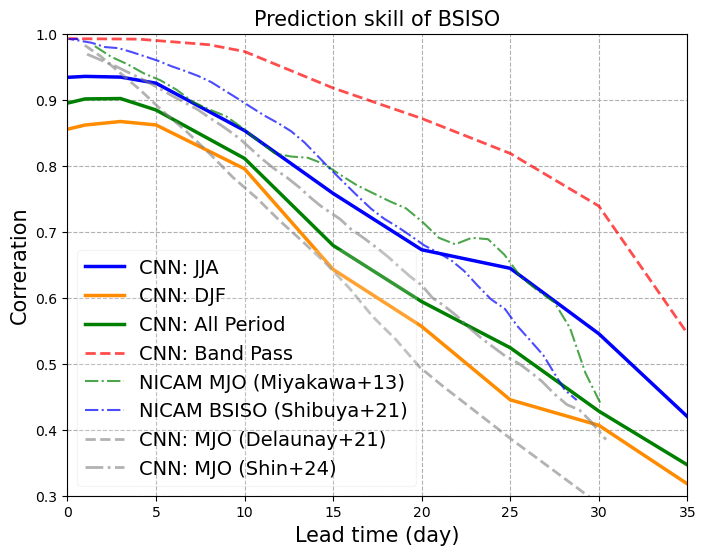

In [9]:
# リードタイムごとの予測スキルの比較
label_box = ['CNN: JJA', 'CNN: DJF', 'CNN: mjjaso', 'CNN: ndjfma', 'CNN: All Period']
plt.figure(figsize=(8,6))
# cnn model
plt.plot(lead_time, cor[:,0], label=label_box[0], color='b', linewidth=2.5)
plt.plot(lead_time, cor[:,1], label=label_box[1], color='darkorange', linewidth=2.5)
plt.plot(lead_time, cor[:,4], label=label_box[4], color='g', linewidth=2.5)

# 先行研究の結果の比較
plt.plot(cnn_bp[:,0], cnn_bp[:,1], label='CNN: Band Pass', color='r', linestyle='--', alpha=0.7, linewidth=2)
plt.plot(nicam_mjo[:,0], nicam_mjo[:,1], label='NICAM MJO (Miyakawa+13)', color='g', linestyle='-.', alpha=0.7)
plt.plot(nicam_bsiso[:,0], nicam_bsiso[:,1], linestyle='-.', color='b', label='NICAM BSISO (Shibuya+21)', alpha=0.7)
plt.plot(cnn_mjo_21[:,0], cnn_mjo_21[:,1], linestyle='--', color='grey', label='CNN: MJO (Delaunay+21)', alpha=0.6, linewidth=2)
plt.plot(cnn_mjo_24[:,0], cnn_mjo_24[:,1], linestyle='-.', color='grey', label='CNN: MJO (Shin+24)', alpha=0.6, linewidth=2)

plt.xlim(0,35)
plt.ylim(0.3,1.0)
plt.xlabel('Lead time (day)', fontsize=15)
plt.ylabel('Correration', fontsize=15)
plt.title('Prediction skill of BSISO', fontsize=15)
plt.grid(linestyle='--')    
# legend で透過度を指定
plt.legend(fontsize=14, framealpha=0.2)

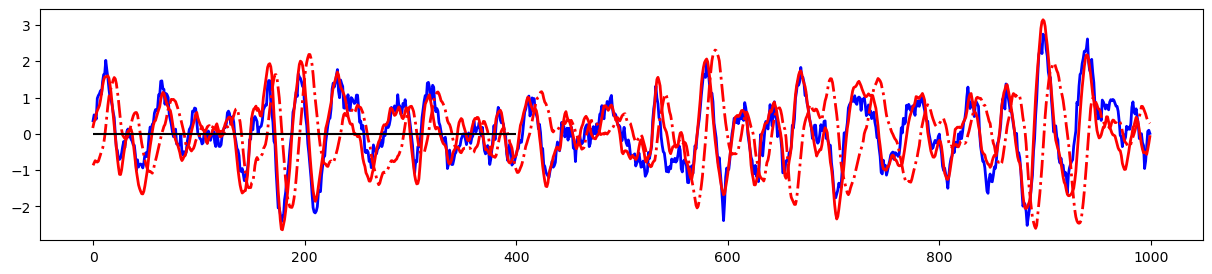

In [24]:
plt.figure(figsize=(15, 3))
plt.plot(pred[0][:1000,1], label=label_box[0], color='b', linewidth=2)
plt.plot(sup[0][:1000,1], label='sup', color='r', linewidth=2)
plt.plot(sup[0][:1000,0], label='sup', linestyle='-.',color='r', linewidth=2)
plt.hlines(0,0,400, color='k')